# 1 Model of Learning Procedure

## Naive Learning

We implement the naive learning scheme. More specifically we want to represent a map from of $X$ to $y$ intuitively -- by using a complete table of all possibilities exhaustively. To make it possible, we limit $X$ to be a discrete 2D tuple -- be one of a dot in a 2D square array, you will see examples shortly -- and $y$ to be 0 or 1. 

- Build a `Python object` to represent all the possible relationship between $X$ and $y$
- Given a training sample, i.e. a pair of $X$ and $y$, the learning-model object can eliminate all the possibilities that are incompatible with the observation.
- Given a test sample, i.e. an $X$ without $y$, the learning-model object can return all the possibilities and their respective $y$-values at the test $X$.

### Represent All X-Samples

#### Attempt Round 1

In [0]:
def generate_all_X_space_samples():
    """
    As the function name shows,  here we want to return the 
    complete set of possible X values. The straightforward 
    implementation of the X-space is a list of tuples. Let us 
    consider a simple range: the integers from 0 to N-1, and 
    use this range for both dimensions. Say N=3, we want to 
    generate X-samples as
    [
        (0, 0),
        (0, 1),
        (0, 2),
        (1, 0),
        (1, 1),
        (1, 2),
        (2, 0),
        (2, 1),
        (2, 2),
    ]
    
    For small N, we can explicitly write out the list, but we need 
    a program to generate such a list for arbitrary N:
    """
    
    # Let's make an empty list
    X_space = []
    
    # Study the elements in the example list, and fill up our
    # X_space, e.g. by
    X_space.append((0, 0)) # A sample in X is a tuple, so we use 
    # a pair of parentheses, i.e. the input to the "append" function
    # is "(0, 0)", not "0, 0", which will be interpreted as 2 inputs.
    X_space.append((0, 1))
    X_space.append((0, 2))
    # ... you can complete the rest if you wish, but better read on.
    # we will use smarter methods.
    
    # Last but note least, 
    return X_space

<span style="color:#006000"><b>EXERCISE</b></span>
In the cell below, experiment with the function `generate_all_X_space_samples` we just defined. You can manipulate the definition of the function  and  observe the change of its behaviour. 

In [0]:
X_space = generate_all_X_space_samples()
print(X_space)

#### Attempt Round 2

In [0]:
def generate_all_X_space_samples():
    """
    We will use loops to generate the tuples!
    """
    
    # Let's make an empty list
    X_space = []
    
    # Simple observation shows the first 3 tuples are (0, j)
    # and j is running from 0 to 3 (exclusive, Python convention)
    
    # This is the perfect case to use a for-loop, so we can write the
    # list building program this way:
    
    # for j in range(3):
    #     X_space.append((0, j))
    # for j in range(3):
    #     X_space.append((1, j))
    # for j in range(3):
    #     X_space.append((2, j))
    
    # You may have noticed, the first element in each tuple in those
    # loops runs from 0 to 3 (exclusive) as well, and can also be
    # managed by a loop
    for i in range(3):
        for j in range(3):
            X_space.append((i, j))
    return X_space

<span style="color:#006000"><b>EXERCISE</b></span>
Experiment with the for loop above. Try to generate x spaces of different sizes. 

#### Attempt Round 3

We further adjust our implementation in two ways:

1. It is natural for the function to be flexible so we can generate different sizes of X conveniently without rewriting the code every time.

2. Python provides a more natural way to write loops to generate object collections (e.g. list of objects). 

Let's try 2 in the cell below and then re-write our X-sample generator.

In [0]:
# 1. building list by appending one element each time
my_list_a = []
for i in range(5):
    my_list_a.append(i**2) # square
print("List-a of Sqr for [0, 5):", my_list_a)

# 2. Write the message above naturally as python code
my_list_b = [i**2 for i in range(5)] # Bracket [..] to construct a list
print("List-b of Sqr for [0, 5):", my_list_b)

<span style="color:#006000"><b>EXERCISE</b></span>
Try to generate a list of even numbers from 2 to 10 (exclusive)

In [0]:
# 3. Powerful generator
# The element object can be complex object. 
# The []-generating loop can be nested.
# The generation process can be conditioned, too.

my_list_c = [(j, j + i**2) for i in range(10)
             if i % 2 == 0
             for j in range(100, 600, 100)
             if j != 300]
print(my_list_c)

__CAVEAT__: Although looking very neat, internally this kind of generator does not save you any time or space complexity.  It is purely for readability,  so use it only to IMPROVE the readability!

In [0]:
def generate_all_X_space_samples(N):
    """
    Generate complete sample of X-space
    :param N: Discrete X-space dimension size. The size is homogeneous
      in all dimensions.
    :type N: int
    """
    
    return [(i, j) for i in range(N)
            for j in range(N)]

<span style="color:#006000"><b>EXERCISE</b></span>
In the cell below, experiment with the new function `generate_all_X_space_samples` we just defined. Please try different X-space sizes and investigate different X-samples.

In [0]:
X = generate_all_X_space_samples(3)
print("There are {} samples in X-space.".format(len(X))) # {}-format
# is used to inject some information from variables to a string.
print("All samples:\n\t", X) # \n: new line, \t indent

# You can also investigate using multiple print's
for sample_id in range(len(X)): # Try to figure out the construction
    print("Sampe {}: {}".format(sample_id, X[sample_id]))
    
# You can use [:] indexing to conveniently check a subset of data samples
print("Sample 1-5 (exc):", X[1:5])
# [:End] means start from 0
print("Sample 0-3 (exc):", X[:3])
# Similarly, [Start:] means until the end
print("Sample 3-Last (inc):", X[3:])
# You can use -i (<0 index) to represent "reversing from the end"
print("Last Sample:", X[-1])
print("Sample 3-Last (exc):", X[3:-1])

#### Attempt Round 4 -- Using Numpy Arrays

Python list is convenient for us to store and access data samples.  When it comes to doing analysis or machine learning algorithms it is more convenient if we can easily access individual attributes or perform computational operations on specified parts of the data. We will use numpy library, it is designed to manage array data. Numpy arrays can also be easily converted to/from `data frames`, `GPU device arrays`, `images (pixel arrays)`, etc.

In [0]:
# Let us use the numpy library
import numpy as np # the "as" is optional and to save typing

def generate_all_X_space_samples_np(N):
    """
    :param N: X-space will be an N by N discrete-valued array
    """
    
    # Let's make an empty list
    X_space = np.zeros((N**2, 2)) # the 
    
    # Loop is similar to that in Round2
    # except that all samples are created at the
    # beginning, and we now use an index to loop over them
    index = 0
    for i in range(N):
        for j in range(N):
            X_space[index][0] = i
            X_space[index][1] = j
            index += 1
    return X_space

In [0]:
X_np = generate_all_X_space_samples_np(3)
print(X_np)
print(type(X_np)) # Note the type is a np-array
# Check out a sample
i = 3
print("An X-Sample[{}]:{}".format(i, X_np[i]))
# Check attribute-0 for all samples
j = 0
print("X-Attribute[{}]:{}".format(j, X_np[:, j]))
# [:, 0]: take from all (:) samples, the attribute-0

<span style="color:#006000"><b>EXERCISE</b></span>
Please check (print out) the second (index=1) attribute for samples 1-5 (exclusive). 

Numpy arrays provide interface to apply computations for all elements. E.g. we may want to scale all elements in $X$ between $[0, 1]$. Numpy arrays provide interface to apply computations for all elements. Using an ordinary Python list,  we need to reconstruct another list to store the result,  and perform the competition element by element.

In [0]:
def scale_X_to_0_1(X, N):
    """
    Get a new list scaling the elements in X by 1/N.
    """
    new_list = []
    for x in X: # you can iterate over each element (a tuple in x)
        # now x is one data sample in X, such as (0, 2)
        new_list.append((x[0]/N, x[1]/N))
    return new_list

In [0]:
X = generate_all_X_space_samples(5)
X1 = scale_X_to_0_1(X, 5)
print(X1)

In [0]:
# On te other hand, operating on numpy array is much easier
X_np = generate_all_X_space_samples_np(5)
X1_np = X_np/5
print(X1_np)

Not only the code is more concise. The computation is done internally using fast C implementation, and therefore more efficient.

In [0]:
%timeit X1 = scale_X_to_0_1(X, 5)

In [0]:
%timeit X1 = X1_np = X_np/5

<span style="color:#006000"><b>EXERCISE</b></span>
Note the time units $\mu$s ($10^{-6}$ sec) / ns ($10^{-9}$ sec) used in the measurement above. You can make a larger matrix e.g. using `generate_all_X_space_samples(500)` and compare the difference. 

Finally, `numpy` provides an interface to generate this kind of X samples,  by sampling a grid in a multidimensional space. `meshgrid` takes the grid positions at each dimension and returns the grid matrices. In our example, matrix-0 for attribute-1, and matrix-1 for attribute-0 (the order of attributes can be adjusted when we composing the final X, and is not essential). I will not go to details please find more about the function referring to the [doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html).

Please study the following example for some basic array operations.

In [0]:
def generate_all_X_space_samples_np(N):
    """
    :param N: X-space will be an N by N discrete-valued array
    """
    X0, X1 = np.meshgrid(np.arange(N), np.arange(N))
    # We will have the following for N=3
    # X0:      X1:
    # 0 1 2    0 0 0
    # 0 1 2    1 1 1
    # 0 1 2    2 2 2
    
    # X0, if "flattened", becomes
    # 0 1 2 0 1 2 0 1 2
    
    # flattened X0 and X1 if "stacked" becomes
    # [[0 1 2 0 1 2 0 1 2
    #  [0 0 0 1 1 1 2 2 2]]
    
    # The following matrix, 
    # [[a b c]
    #  [d e f]]
    # if "transposed" (numpy operator "T"), becomes
    # [[a d]
    #  [b e]
    #  [c f]]
    return np.stack([X0.flatten(), X1.flatten()]).T

In [0]:
print(generate_all_X_space_samples_np(3))

In [0]:
%timeit generate_all_X_space_samples_np(500)

In [0]:
%timeit generate_all_X_space_samples(500)

In [0]:
# Finally, we can make version that includes the normalisation 
# (1/N) in the construction
def generate_all_X_space_normalised_samples_np(N):
    """
    :param N: X-space will be an N by N discrete-valued array
    """
    X0, X1 = np.meshgrid(np.arange(N), np.arange(N))
    return np.stack([X0.flatten(), X1.flatten()]).T / N

### Represent all possible X-y relations

We will create a template from which we can generate objects, which represent  _generic_ relationship from all $X$-samples in to binary $y$.

#### Initialise the framework

In [0]:
# Let us first prepare the X-space as discrete samples as above. 
# And before we start building all the possible X-y mappings. 
# It is sensible to have an idea about how many such 
# mappings we are going to consider.

# So here is our first attempt of making the object template 
# of the all-inclusive mapping representation.
class CompleteDiscrete2DBinaryMapping(object):
    """
    An exhaustive representation of 2D X space to binary targets.
    The 2D space is represented using discrete grid points.
    """
    def __init__(self, N):
        """
        Create an object representing all possible mappings from 
        2D grid points to {0, 1}. 
        :param N: X-space samples are N by N grid in [0, 1)**2
        """
        self.grid_x = generate_all_X_space_samples_np(N)
        self.h_size = 2 ** (N**2)
        
    def size(self):
        """
        Total number of possible mappings.
        
        Note this tend to be really large number for any
        respectable N.
        """
        return self.h_size

In [0]:
complete_model = CompleteDiscrete2DBinaryMapping(10)
print("We are going to build {} different mappings."
       .format(complete_model.size()))

<span style="color:#006000"><b>EXERCISE</b></span>
Please review our discussion in class and figure out why we compute the size of the possible mappings to be $2^{N^2}$? 

So for any respectable problem size,  exclusively consider all possibilities is exceeding the capability of a computer. Can we possibly implement such an object?

#### Focus on prediction

Yes and no, we employer implement a representing all possible mappings.  But we cannot wait for it to make any useful predictions,  because it takes very long time to work. The point here we will adopt the _duck-typing_ / interface oriented programming protocol to have some object that works. This way of building programs is widely used in Python (and particularly useful in data science where the storage demand can be very large).

Duck-typing: 

> If something that walks like a duck and the quacks like a duck then it is probably a duck.

That is, we focused on how the object will be used and maintaining necessary information in working conditions only. 

Since we are implementing a data model _family_. At any particular call, we need only to specify the $y$ value (0 or 1) for some $X = (X_1 \in [0, 1), X_2 \in [0, 1))$ according to a _particular member_ in this family. That is, we do not need to worry about storing all possible mappings at one time.

In [0]:
# To be specific, we just need to implement such a function
def predict_according_to_hypothesis(X, hypothesis_id):
    """
    :param X: a data has 2 attributes
    :param hypothesis_id: a number in 0..1267650600228229401496703205376 
        (e.g. N=10)
    NOTE: for stand-alone function (not belonging to any class,
        "unbounded" is the technical term), we don't have the "self"
        in the first place in the input argument list.    
    """
    y = 0 # or 1
    return y

#### Predict using one assigned hypothesis

Now we need to solve two problems,
1. We need to verify the input X as one of the 2D grid points  according to our problem setting.  If it is not, quantise it to one of them.
2. Figure out according to the particular mapping specified by `hypothesis_id` (The technical term of such a hypothetical mapping is a _hypothesis_),  what is the corresponding y value.

The first problem can be solved by finding the nearest the neighbour to the input X from all the 2D grid points. This, of course, will remind us the nearest neighbour classifier. There is one essential difference though: there is no training data for our nearest neighbour classifier to refer to, so we have to assign some hypotheses, which leads us to the second problem.

In [0]:
# To compute the nearest neighbour, 
# please experiment with the following code.
X_np = generate_all_X_space_samples_np(2)
print("2D points")
print(X_np)
Xin = np.array((1, 2))
print("Input X")
print(Xin)
print("Difference")
print(X_np - Xin)

Amazingly, we have implemented the difference between the input $X$ to __each one of the grid points using just one operation__.  This seemingly incompatible substraction has been implemented in numpy using the mechanism _broadcasting_. It allows binary operators to work between one array $A$ of 
$n_1 \times n_2 $ and the other $B$ of $n_2$, while considering the larger $A$ to contain $n_1$ small arrays and applying the operation between each of the $n_1$ small arrays and $B$. 

It also generalises to the case when A is of $n_1 \times n_2 \times n_3 \times n_4$ and B is of $n_3 \times n_4$. Then we view $A$ as $n_1\times n_2$ cells and each cell is an $n_3 \times n_4$ array.


In [0]:
# To compute the nearest neighbour
diff = X_np - Xin
diff_square = diff ** 2 # each element
diff_norm2 = diff_square.sum(axis=1) # summing up every row, so now we have 
# N**2 distances (same number of X-rows) and need only to find the 
# smallest one.

In [0]:
print("The index of the nearest x-grid point is {}"
      .format(np.argmin(diff_norm2))) # argmin returns the index of the 
# smallest element in an array (take care and read doc for multi-dim arrays)

There we consider what the hypothesis would say about the y value at that particular x-grid point, such as point-3. You may have already guessed as we have totally $N^2$ x-grid points,  and the total number of possible hypotheses is $2^{N^2}$. We are exploring all possible binary combinations with $N^2$ bits. Say, $N=3, N^2=9$, we just count 9-bit binary numbers. And if you ask: what is hypothsis-178’s prediction on the 3rd x-grid point. We can just check the 3rd bit of the binary number corresponding to 178.

In [0]:
# to convert a number to binary format
print("{:b}".format(35))
# to specify the number of bits
print("{:9b}".format(35))
# to specify the number of bits and fill unused bits with 0
print("{:09b}".format(35))
# to specify the number of bits and fill unused bits with 0
# and finally take out the 3rd bit
print("{:09b}".format(35) [2])

# given N, build the "formatting" string (a meta string you use to 
# format other strings
N=3
print("{:0" + str(N**2) + "b}") # "+" concatenates strings

#### Put everything together

In [0]:
class CompleteDiscrete2DBinaryMapping(object):
    """
    An exhaustive representation of 2D X space to binary targets.
    The 2D space is represented using discrete grid points.
    """
    def __init__(self, N):
        """
        Create an object representing all possible mappings from 
        2D grid points to {0, 1}. 
        :param N: X-space samples are N by N grid in [0, 1)**2
        """
        self.grid_x = generate_all_X_space_samples_np(N)
        self.dof = N ** 2 # the degrees of freedom is eaqual to the number
        # of grid points at which you can freely choose {0/1} as the 
        # target value. DoF reduces as you start observing data (when you
        # observe the target value at a point, you lose the freedom of
        # setting it to arbitrary values)
        self.h_size = 2 ** self.dof
        
    def size(self):
        """
        Total number of possible mappings.
        
        Note this tend to be really large number for any
        respectable N.
        """
        return self.h_size
    
    def predict_according_to_hypothesis(self, X, hypothesis_id):
        """
        Note, when implement as class method, don't miss "self"
        :param X: a data has 2 attributes
        :param hypothesis_id: a number in 0..1267650600228229401496703205376 
            (e.g. N=10)
        """
        X = np.array(X) # make the input format more flexible, e.g.
        # you can use [0, 2] (Python list), or (0, 1) (Python tuple)
        d = ((self.grid_x - X)**2).sum(axis=1)
        bit_id = np.argmin(d)
        format_string = "{:0" + str(self.dof) + "b}"
        y = int(format_string.format(hypothesis_id) [bit_id])
        return y

In [0]:

complete_model = CompleteDiscrete2DBinaryMapping(10)
print("We are going to build {} different mappings."
       .format(complete_model.size()))

In [0]:
# This won't stop!
for hypothesis_id in range(complete_model.size()):
    print(complete_model
          .predict_according_to_hypothesis((8, 7), hypothesis_id))

### Fit to Training Data

(We will start moving faster from here.) Now suppose we are given training samples in the following format: $\{x_1 = \langle(0, 1), 1\rangle, x_2 = \langle(3, 4), 0\rangle\}$. How would the information affect our belief about the $X$-$y$ mapping?

We will introduce a method `fit`, which checks consistency between every hypothesis and the observed data and removes those hypotheses that disagree with the data.

In [0]:
class CompleteDiscrete2DBinaryMapping(object):
    def __init__(self, N):
        self.grid_x = generate_all_X_space_samples_np(N)
        self.dof = N ** 2
        self.h_size = 2 ** self.dof
        self.inconsistent_hypotheses = []
        
    def size(self):
        return self.h_size
    
    def predict_according_to_hypothesis(self, X, hypothesis_id):
        X = np.array(X)
        d = ((self.grid_x - X)**2).sum(axis=1)
        bit_id = np.argmin(d)
        format_string = "{:0" + str(self.dof) + "b}"
        y = int(format_string.format(hypothesis_id) [bit_id])
        return y
    
    # Let add a `fit` method
    def fit(self, X, Y): 
        """
        :param X: [M x 2] training data
        :param Y: [M] labels
        """
        # Let's check consistency for each training data and each hypothesis 
        for hid in range(self.h_size):
            for x_, y_ in zip(X, Y): 
                # be careful if the training set contains only 1 sample!
                # zip is literally zipping two "iterables" so the zipped object
                # yield multiple elements in each iteration.
                pred = self.predict_according_to_hypothesis(x_, hid)
                if pred != y_:
                    if hid not in self.inconsistent_hypotheses:
                        self.inconsistent_hypotheses.append(hid)
                    break # we have determined this hid is bad and no need
                    # to continue
        
        
    def predict_trained(self, X):
        return [
            self.predict_according_to_hypothesis(X, hid)
            for hid in range(self.h_size)
            if hid not in self.inconsistent_hypotheses
        ]

In [0]:
# Test using the example we have seen in class
complete_model = CompleteDiscrete2DBinaryMapping(3)
X_trn = [
    (0, 2),
    (1, 2),
    (1, 0),
    (1, 1),
    (2, 0),
    (2, 1),
]
Y_trn = [0, 0, 1, 1, 1, 1]
complete_model.fit(X_trn, Y_trn)

In [0]:
complete_model.predict_according_to_hypothesis((0,2), 3)

In [0]:
# Let us use the model to predict
complete_model.predict_trained((0, 2))

<span style="color:#006000"><b>EXERCISE</b></span>
Interpret how `predict_trained` works. 

__Improvement Idea 1__

Let's apply the "duck-typing" principle again -- we don't need to explicitly find out all inconsistent hypotheses and exclude them when testing. We can construct hypothesis set that is consistent. 


__Improvement Idea 2__

Try to increase the quantisation number $N$ to $4$ (or $5$ if you are in a more adventurous mood) and see how the model works. Next we will introduce limitations on the possibile hypotheses. See below

## Data Models (Preview)

<span style="color:#006000"><b>PREVIEW EXERCISE</b></span>
Figure out how the "linear" model below works. Try to introduce a non-trivial threshold when the hypotheses making predictions (See `PREDICTION BY INDIVIDUAL HYPOTHESIS`). 

In [0]:
# A Simple Linear Model Family
import numpy as np
class LinearHypothesisSpace:
    def __init__(self, quant_num=3):
        self.quant_num = quant_num
        grid_x0, grid_x1 = np.meshgrid(np.arange(self.quant_num),
                                       np.arange(self.quant_num))
        grid_x0 = grid_x0.flatten()
        grid_x1 = grid_x1.flatten()
        self.grid_x = np.stack([grid_x0, grid_x1]).T

        eps_angle = np.pi / 18
        angles = np.arange(0, np.pi, eps_angle)
        self.hypotheses = np.zeros((2 * len(angles), self.quant_num ** 2),
                                   dtype=np.int)
        x0 = grid_x0 - (quant_num - 1) / 2
        x1 = grid_x1 - (quant_num - 1) / 2
        for i, th in enumerate(angles):
            w = min(np.tan(th), 9999)
            # ** PREDICTION BY INDIVIDUAL HYPOTHESIS **
            ya = (x0 * w - x1 > 0).astype(np.int)
            yb = 1 - ya
            self.hypotheses[2 * i, :] = ya
            self.hypotheses[2 * i + 1, :] = yb
        self.sele_hypothesis_id = None

    def fit(self, x, y):
        x_ind = x[:, 0] + self.quant_num * x[:, 1]
        pred_trn = self.hypotheses[:, x_ind]
        accu_trn = pred_trn == y[np.newaxis, :]  # type: np.ndarray
        accu_trn_n = accu_trn.astype(np.float).sum(axis=1)
        self.sele_hypothesis_id = np.argmax(accu_trn_n)

    def predict_all_X(self, hypothesis_id=-1):
        h = self.hypotheses[self.sele_hypothesis_id] \
            if hypothesis_id == -1 \
            else self.hypotheses[hypothesis_id]
        return self.grid_x, h

In [0]:
linear_model0 = LinearHypothesisSpace(3)
X_trn = np.array([
    (0, 2),
    (1, 2),
    (1, 0),
    (1, 1),
    (2, 0),
    (2, 1),
])
Y_trn = np.array([0, 0, 1, 1, 1, 1])
linear_model0.fit(X_trn, Y_trn)

In [0]:
X_all, y_all = linear_model0.predict_all_X()

### Visualing the model behaviour

In [0]:
# Finally, let us visualise the model behaviour, we will us an interactive 
# visualision tool.

# NOTE drawing graphs is one noticeable difference between running your
# Python notebook on cloud (where the computers don't have screens and have
# to deliver graphics objects to your browser to render on YOUR screen), and 
# on local computer (where graphics display natively using graph interface 
# provided by your local OS). So we make a bit configuration here. 
#
# If the graphs don't work on your computer, try on colab, or you can 
# change to classical matplotlib library, which is easier to make working.


I_AM_RUNNING_THIS_NOTEBOOK_ON_MY_OWN_COMPUTER = True
COLAB = not I_AM_RUNNING_THIS_NOTEBOOK_ON_MY_OWN_COMPUTER

In [0]:
if COLAB: # We need to upgrade plotly to 4.0 for it to work with colab
    # [as of July 2019] this will obsolete soon when Google upgrades colab
    !pip install plotly --upgrade
    # Peform the same on your own computer if encountering issues, but only
    # do it once and for all. colab is a virtual machine, so you need to
    # perform the upgrading each time restarting a session.

In [0]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Scatter(
        x=X_all[:, 0], 
        y=X_all[:, 1], 
        marker_color=y_all,
        marker_size=12,
        marker_line_width=2,
        mode="markers")],
    layout_title_text="Prediction on a Discretised 2D X-Space"
)
if COLAB:
    fig.show(renderer="colab")
else:
    fig.show()

In [0]:
# Now we can handle decently sized (2D discrete) data space
hypothesis_id = 21 # we havn't trained the model, so need to specify which hypo
# we want to check
linear_model1 = LinearHypothesisSpace(50)
X_all, y_all = linear_model1.predict_all_X(hypothesis_id)
fig = go.Figure(
    data=[go.Scatter(
        x=X_all[:, 0], 
        y=X_all[:, 1], 
        marker_color=y_all,
        marker_size=12,
        marker_line_width=2,
        mode="markers")],
    layout_title_text="Prediction on a Discretised 2D X-Space"
)
if COLAB:
    fig.show(renderer="colab")
else:
    fig.show()

## Summarise

- We have built a omnipotently useless 2D classifier!
- We tried out a linear modeller.
- We have learned some useful Python and numpy skills.
- We have made nice pictures!

# 2 Model Complexity

In [0]:
# Environment and constant preparation
import numpy as np
from sklearn.datasets import load_iris
try:
    import plotly.graph_objects as go
except:
    !pip install plotly==4.1.0
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

COLAB = False
IRIS_EXPERIMENT_X_SPACE_QUANTISATION_BIN_NUM = 50 # self-interpretation

def generate_all_X_space_normalised_samples_np(N):
    """
    :param N: X-space will be an N by N discrete-valued array
    """
    X0, X1 = np.meshgrid(np.arange(N), np.arange(N))
    return np.stack([X0.flatten(), X1.flatten()]).T / N

We will test models of different complexities on the simplified Iris data.

## Prepare Iris Data

Let us first prepare the Iris Data into the simplified format. The simplification steps are
1. we consider the problem of detecting Versicolour (as the postitive class, class-1), to make it even simpler, I will consider Setosa as the negative class (class-0)
2. we use only the first two attributes
3. we will discretise the attributes into 50 "ticks" -- This is not necessary for data modelling. This is to be consistent with our experiments on "how data modelling worked in a grid in the entire X-space"

In [0]:
# load the data
iris_db = load_iris()
all_x = generate_all_X_space_normalised_samples_np(
    IRIS_EXPERIMENT_X_SPACE_QUANTISATION_BIN_NUM)

__SHORT-CUT__ The exercises from 2.1.1 to 2.1.4 are for programming skills only. Jump to [2.1.5](#Data-preprocessing-summary) to quickly get preprocessed data, if you want to skip learning programming skills.

### Exploring the data

<span style="color:#006000"><b>EXERCISE</b></span>
Follow the following few code cells, experiment with inspecting the dataset. (Adjust the code, observe what you get and try to explain why).

In [0]:
# BEGIN Data Inspection

In [0]:
# load_iris returns an object `iris_db`, but for now, we don't have much 
# information on the object. We usually start studying unknown objects
# in one of the following two steps.

# 1. check what is its `type`, and see what the author of the object template 
# (the class) has to say
print(type(iris_db))

In [0]:
# Depending on your environment, the result should be something like
# <class 'sklearn.utils.Bunch'>
# "Bunch" is the name of the class, living in the "utils" sub-module
# which, in turn, is in the "sklearn" library.

# Now let's get some help of the class. (most popular libraries
# are well documented)
iris_db?

In [0]:
# As the doc-string doesn't provide much information of this object.
# let's try method
# 2. duck-typing: check how the object "quacks" and "walks"
dir(iris_db) # dir() lists methods / attributes of an object.

# you may find "DESCR" to be useful, try to print it out.

In [0]:
# The most interesting parts of the dataset object are
# `data` and `target` of course. Let's check `data`.
type(iris_db.data), type(iris_db.target)

In [0]:
# We are familiar with numpy arrays. Perform some standard checks
print(iris_db.data.shape, iris_db.target.shape)

In [0]:
# This looks like 150 data samples with 150 corresponding labels.
print(iris_db.data[:10], iris_db.target[:10])

In [0]:
# END of Data Inspection

In [0]:
# just to save typing
X, y = iris_db.data, iris_db.target

### Simplification: Class Setosa vs Versicolor

Without losing generality, we take a further simplification step by considering only two flower classes. Rather than identifying versicolor from all iris flowers, we distinguish Versicolor from Setosa. Now we take the samples belonging to the first two classes (`target==0` for setosa and `target==1` for versicolor). 



#### A note on programming $^{ProgSkill}$

(Skip such sections/comments on programming skills (marked with $^{ProgSkill}$) if you feel comfortable to).

The hard part is to express an idea in clear and specific terms. It is relatively easy to translate such expressions into any particular programming language. For example, consider the task to take the samples belonging to the first 2 classes and make a subset of the data set.

To specify a subset,  we consider the conditions each individual element in the subset should satisfy:  for our task, that is “the target value of this sample is 0 or the target value of this sample is 1”. 

In [0]:
# So the idea becomes: 
# for each training sample, (let us identify the training sample 
# using an index i), 
# - include the data[i] and the target[i] in the subset, 
#   if target[i] is 0 or 1.

# translating the idea into a program
X_sub = []
y_sub = []
for i in range(len(iris_db.data)): 
    # [EXERCISE] What does range(len(...)) do 
    # for an ensemble object? 
    if iris_db.target[i] == 0 or iris_db.target[i] == 1:
        X_sub.append(iris_db.data[i])
        y_sub.append(iris_db.target[i])


In [0]:
# Check what we have obtained.
print(X_sub[0:5])
print(y_sub[0:5])

In [0]:
# We can organise X_sub and y_sub as numpy arrays.
# (so we can access the elements more easily)
X_sub = np.array(X_sub)
y_sub = np.array(y_sub)
print(X_sub[0:5])
print(y_sub[0:5])

Python allows us to express the idea more directly: the for-loop can be constructed using every pair of X and y in the training dataset, without introducing an index. Try the following code block.

In [0]:
# Translating the idea into a program
X_sub = []
y_sub = []
for x_, y_ in zip(iris_db.data, iris_db.target): 
    # [EXERCISE] Print the iteration variables in a zipped list.
    # I.e. construct two lists L1 and L2, and make a for loop
    # over "a, b in zip(L1, L2)", check the values of a and b.
    if y_ == 0 or y_ == 1:
        X_sub.append(x_)
        y_sub.append(y_)
X_sub = np.array(X_sub)
y_sub = np.array(y_sub)

In [0]:
# (*) We can use more "descriptive", less "instructive" construction
X_sub = np.array([x_ for x_, y_ in zip(iris_db.data, iris_db.target)
                  if y_ == 0 or y_ == 1])
y_sub = np.array([y_ for x_, y_ in zip(iris_db.data, iris_db.target)
                  if y_ == 0 or y_ == 1])

#### Fast selection using numpy array

Numpy allows to use boolean conditions as indexes for arrays. Check the [document][bool-ind] for more details.

[bool-ind]:https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html

In [0]:
X_sub = X[(y==0) + (y==1)] # "+" for boolean OR
y_sub = y[(y==0) + (y==1)]

# Consolidate following reference to the data
X = X_sub
y = y_sub

### Take the first 2 attributes

In [0]:
X = X[:, :2]

### Discretise the attributes into 50 "ticks" $^{ProgSkill}$

We align training samples in the data into grids in X-space. This is mostly for the consistency of demonstration and practice purposes. You can skip this section and the experimental results below would be approximately the same.

Simply speaking, it works like as if you ticking the “align to grid” option when organising the icons on your desktop screen. The samples will be “snapped” to the points in a grid in the 2D X-space. This makes the training data part of the “complete X-space points” we will use for demo.

In [0]:
quant_num = IRIS_EXPERIMENT_X_SPACE_QUANTISATION_BIN_NUM

# A grid of cells to store the y-values in each area in
# X-space. 
data_bins = [[[] for a1 in range(quant_num)]
             for a2 in range(quant_num)]

# Decide which bin each training sample belongs to

# 1. We want the smallest value of an attribute to be stored in bin[0]
#    and largest in bin[49] (say, for 50 bins)
attrib0_min_value = X[:,0].min()
attrib0_max_value = X[:,0].max() # perform 0-1 normalisation on attribute 0
X[:, 0] = (X[:, 0] - attrib0_min_value) / (attrib0_max_value - attrib0_min_value)

attrib1_min_value = X[:,1].min()
attrib1_max_value = X[:,1].max()
X[:, 1] = (X[:, 1] - attrib1_min_value) / (attrib1_max_value - attrib1_min_value)

for x_, y_ in zip(X, y):
    attrib0_bin_index = int(round(x_[0] * (quant_num - 1)))
    attrib1_bin_index = int(round(x_[1] * (quant_num - 1)))
    data_bins[attrib0_bin_index][attrib1_bin_index].append(y_)
    # print(attrib0_bin_index, attrib1_bin_index)
    
# now we can arrange the data in a grid
X_quant = []
y_quant = []
for grid_row in range(quant_num):
    for grid_col in range(quant_num):
        this_bin = data_bins[grid_row][grid_col]
        if len(this_bin) > 0:
                X_quant.append((grid_row, grid_col))
                vote = int(round(np.mean(this_bin))) # if more than one y-value
                # has been allocated to this cell (small area in X-space),
                # we let them vote and take the majority.
                y_quant.append(vote)
                
X_quant = np.array(X_quant) / quant_num # (0..1)
y_quant = np.array(y_quant)

In [0]:
X = X_quant
y = y_quant

### Data preprocessing summary

Put all preprocessing steps together. Run the two cells below for proprocessed data. 

In [0]:
def preproc_data_for_complexity_experiment_quick(iris_db):
    
    X, y = iris_db.data, iris_db.target
    X = X[(y==0) + (y==1)][:, :2]
    y = y[(y==0) + (y==1)]
    
    # normalise to 0-1
    X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    return X, y

def quantise_data(X, y, quant_num):
    
    # merge different y-values in the same cell                 
    X = np.round(X  * (quant_num - 1)).astype(np.int)
    data_bins = [[[] for a1 in range(quant_num)]
             for a2 in range(quant_num)]
    for (a1_, a2_), y_ in zip(X, y):
        data_bins[a1_][a2_].append(y_)
    X_quant = []
    y_quant = []
    for grid_row in range(quant_num):
        for grid_col in range(quant_num):
            this_bin = data_bins[grid_row][grid_col]
            if len(this_bin) > 0:
                    X_quant.append((grid_row, grid_col))
                    vote = int(round(np.mean(this_bin))) # if more than one y-value
                    # has been allocated to this cell (small area in X-space),
                    # we let them vote and take the majority.
                    y_quant.append(vote)
    X = np.array(X_quant) / quant_num # (0..1)
    y = np.array(y_quant)
    return X, y

In [0]:
X, y = preproc_data_for_complexity_experiment_quick(iris_db)
# you can comment out the following statement if not wanting quantisation
X, y = quantise_data(X, y, IRIS_EXPERIMENT_X_SPACE_QUANTISATION_BIN_NUM)

### Visualise the data

We will make a figure showing the training data we had prepared

In [0]:
layout = go.Layout(
    xaxis=go.layout.XAxis(
        range=[0, 1],
        showgrid=True,
        zeroline=True,
        showline=True,
        gridcolor='#bdbdbd',
        gridwidth=1,
        zerolinecolor='#969696',
        zerolinewidth=2,
        linecolor='#636363',
        linewidth=2,
        mirror=True,
    ),
    yaxis=go.layout.YAxis(
        range=[0, 1],
        showgrid=True,
        zeroline=True,
        showline=True,
        gridcolor='#bdbdbd',
        gridwidth=1,
        zerolinecolor='#969696',
        zerolinewidth=2,
        linecolor='#636363',
        linewidth=2,
        mirror=True,
   ),
   height=600,
   width=600,
)

fig = go.Figure(
    data=[
        go.Scatter(
            x=all_x[:, 0], 
            y=all_x[:, 1], 
            marker_color="rgba(0.7, 0.7, 0.7, 0.3)",
            marker_size=6,
            marker_line_width=2,
            mode="markers",
            name="'All' X Space Samples"),
        go.Scatter(
            x=X[:, 0], 
            y=X[:, 1], 
            marker_color=y,
            marker_size=12,
            marker_line_width=2,
            mode="markers",
            name="Dataset Samples"), 
    ],
    layout=layout,
    layout_title_text="Quantized Simplified Iris Data"
)
if COLAB:
    fig.show(renderer="colab")
else:
    fig.show()

## Test model complexity

We use decision trees for example, where different settings of the maximum depths represent different complexity of the models.  I.e. a decision tree that can build many levels of nodes is capable of fit more varieties in the training data,  while a decision tree with only few levels can only make simple splits in the data space.

In [0]:
# This is a replica, FYI. The libraries have been imported above.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

To demonstrate different challenges posed by the random training set during perform machine learning, we set up two conditions:

    i) the number of training data samples is small, for example, we can set it as shown below.
    
    ii) there is noise in the training samples, so simply fit the training samples to high fidelity won’t work very well.


In [0]:
train_num = 40
noise = 0.15

In [0]:
complex_E_in = []
complex_E_out = [] # we cannot compute this, as we don't have the true concept 
# of Iris data. We can make one up in a later version for experiment. But for now, 
# let us use the evaluation on held-out test data instead. See below complex_E_test.
complex_E_test = []
simple_E_in = []
simple_E_test = []

# We perform multiple rounds of experiments to test the statistics of 
# E_in and E_test for different models / experiment settings.

# Randomly add noise to the data.
rng = np.random.RandomState(42)
noisy_y = np.array([
    y_ if rng.rand() > noise else (1-y_)
    for y_ in y
])
for random_seed in range(500):
    # Randomly split training/test data
    X_train, X_test, y_train, y_test = train_test_split(
        X, noisy_y, train_size=train_num, test_size=len(y)-train_num,
        stratify=noisy_y,
        random_state=random_seed)
    
    # Fit a complex model
    dt_complex = DecisionTreeClassifier(max_depth=100)
    dt_complex.fit(X_train, y_train)
    
    # Record training and test error
    pred_on_X_train = dt_complex.predict(X_train)
    E_in = np.sum(pred_on_X_train != y_train) / len(y_train) # error rate
    complex_E_in.append(E_in)
    pred_on_X_test = dt_complex.predict(X_test)
    E_test = np.sum(pred_on_X_test != y_test) / len(y_test) # error rate
    complex_E_test.append(E_test)
    
    # Fit a simple model
    dt_simple = DecisionTreeClassifier(max_depth=2)
    dt_simple.fit(X_train, y_train)
    
    # Record training and test error
    pred_on_X_train = dt_simple.predict(X_train)
    E_in = np.sum(pred_on_X_train != y_train) / len(y_train) # error rate
    simple_E_in.append(E_in)
    pred_on_X_test = dt_simple.predict(X_test)
    E_test = np.sum(pred_on_X_test != y_test) / len(y_test) # error rate
    simple_E_test.append(E_test)

complex_E_in = np.array(complex_E_in)
complex_E_test = np.array(complex_E_test)
simple_E_in = np.array(simple_E_in)
simple_E_test = np.array( simple_E_test)  

In [0]:
print("Complex Tree average E_in mean {:.3f}, std {:.3f}"
      .format(complex_E_in.mean(), complex_E_in.std()))
print("Complex Tree average E_out mean {:.3f}, std {:.3f}"
      .format(complex_E_test.mean(), complex_E_test.std()))
abs_diff = np.abs(complex_E_in - complex_E_test)
print("Complex Tree average |E_out - E_in| mean {:.3f}, std {:.3f}"
      .format(abs_diff.mean(), abs_diff.std()))

print("Simple Tree average E_in mean {:.3f}, std {:.3f}"
      .format(simple_E_in.mean(), simple_E_in.std()))
print("Simple Tree average E_out mean {:.3f}, std {:.3f}"
      .format(simple_E_test.mean(), simple_E_test.std()))
abs_diff = np.abs(simple_E_in - simple_E_test)
print("Simple Tree average |E_out - E_in| mean {:.3f}, std {:.3f}"
      .format(abs_diff.mean(), abs_diff.std()))

__Experiment Records__

<span style="color:green">__EXERCISE__</span>

Please try different experiment settings. Record your findings in the table below (double-click here to edit this cell). Please take notes for the following two topics:
1. Why you had chosen the experiment configurations? Why you thought those numbers are worthy exploration?
2. What did you expect to find for the parameters *BEFORE* you run the experiments?
3. Do the outcomes match your expectation? Explain possible reasons of matching / mismatching. 

| $N$ | $\eta$ | $E_{in}^C $  | $E_{test}^C$ | $D^C$  | $E_{in}^S$  | $E_{test}^S$ | $D^S$  | 
|---|---|---|---|---|---|---|---|
| 40 | 0.15 | 0.000  |  0.413  | 0.413   | 0.202   | 0.321   | 0.124 |

- $N$: number of training samples
- $\eta$: noise level (probability that in a training sample $(x, y)$, $y$ happens to be the _incorrect_ label for $x$.

# 3 Training

In [0]:
# Environment and constant preparation
%matplotlib inline
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
try:
    import plotly.graph_objects as go
except:
    !pip install plotly==4.1.0
import matplotlib.pyplot as plt
import torchvision.datasets as cvdata
import torchvision.transforms as transforms
from pathlib import Path
import torch

DATA_FOLDER = Path("./data").absolute()
DATA_FOLDER.mkdir(parents=True, exist_ok=True)
DATA_FOLDER = str(DATA_FOLDER)
COLAB = False
IRIS_EXPERIMENT_X_SPACE_QUANTISATION_BIN_NUM = 50 # self-interpretation

## 3.1 Preparing Data

We use data from CIFAR object dataset.

### Downloading and Loading Raw Data

In [2]:
# Download and make dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

cifar_trainset = cvdata.CIFAR10(
    root=DATA_FOLDER, train=True,
    download=True, transform=transform)

cifar_all_trainloader = torch.utils.data.DataLoader(
    cifar_trainset, batch_size=64,
    shuffle=False, num_workers=6)

# take two classes for a subset
cifar_classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# collect samples in an overall array
images = []
labels = []
indexes = []
for i, (x, y) in enumerate(cifar_trainset):
    if cifar_classes[y] in ["plane", "bird"]:
        images.append(x)
        twoclass_label = 1 if cifar_classes[y] == "plane" else -1
        labels.append(twoclass_label)
        indexes.append(i)
        
X = torch.stack(images).numpy()
y = np.array(labels)
indexes = np.array(indexes)

0it [00:00, ?it/s]

170500096it [00:04, 36921640.40it/s]                               


In [11]:
cifar_trainset.classes


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

### Preprocessing (Doing Features)

In [3]:
# Defining processing functions
def feature_maker_overall_green(X):
    return X[:, 1].reshape(X.shape[0], -1).sum(axis=1)

def feature_maker_overall_blue(X):
    return X[:, 2].reshape(X.shape[0], -1).sum(axis=1)

def take_a_separable_subset(X, y, original_indexes):
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression()
    lr.fit(X, y)
    pred = lr.predict(X)
    pred_prob = lr.predict_log_proba(X_train)
    confident_ind = np.logical_or(pred_prob[:, 0] > np.log(0.55),
                                  pred_prob[:, 1] > np.log(0.55))
    ind = np.logical_and(confident_ind, pred==y)
    X_simple = X[ind]
    y_simple = y[ind]
    original_indexes_simple = original_indexes[ind]
    return X_simple, y_simple, original_indexes_simple

def prepare_cifar_two_class_data(
    X, y, original_indexes,
    simple=False,
    train_size=1000,
    make_feature_1=feature_maker_overall_green, 
    make_feature_2=feature_maker_overall_blue):
    feature1 = make_feature_1(X)
    feature2 = make_feature_2(X)
    X = np.stack([feature1, feature2], axis=1)
    # normalise to -1 to +1
    X -= X.min(axis=0)
    X /= X.max(axis=0)
    X -= 0.5
    X *= 2.0
    
    X_train, X_test, y_train, y_test, ind_train, ind_test = \
        train_test_split(X, y, original_indexes, 
                         train_size=train_size, test_size=len(y)-train_size)
    return X_train, X_test, y_train, y_test, ind_train, ind_test

def prepare_cifar_two_class_separable_data(
    X, y, original_indexes, train_size=100):
    
    X_simple, y_simple, indexes_simple = \
        take_a_separable_subset(X, y, original_indexes)
    
    X_train_simple, X_test_simple, \
    y_train_simple, y_test_simple, \
    ind_train_simple, ind_test_simple = \
        train_test_split(X_simple, y_simple, indexes_simple, 
                         train_size=train_size, test_size=len(y_simple)-100)
    return X_train_simple, X_test_simple, \
        y_train_simple, y_test_simple, \
        ind_train_simple, ind_test_simple
    
X_train, X_test, y_train, y_test, ind_train, ind_test = \
    prepare_cifar_two_class_data(X, y, indexes)
X_train_simple, X_test_simple, \
y_train_simple, y_test_simple, \
ind_train_simple, ind_test_simple = prepare_cifar_two_class_separable_data(
    X_train, y_train, ind_train)

def quick_separable_train_sample(n=100):
    X_train_simple, X_test_simple, \
    y_train_simple, y_test_simple, \
    ind_train_simple, ind_test_simple = prepare_cifar_two_class_separable_data(
        X_train, y_train, ind_train, train_size=n)
    
    return X_train_simple, y_train_simple, ind_train_simple

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



### Visualisation Functions

In [0]:
# Defining vis-functions
def show_cifar_image(img_id):
    npimg = ((cifar_trainset[img_id][0].detach().numpy() + 1.0) \
        * 128).astype(np.uint8).transpose((1, 2, 0))
    # plt.imshow(npimg, interpolation='nearest') # for larger view
    return Image.fromarray(npimg), npimg

def encode_sample_image(index):
    """
    Generate the resource url to display an image in a webpage.
    This is not used in notebooks. But you can take the function
    in a standalone Python program as a web-server to visual data models.
    """
    import base64
    from io import BytesIO

    pil_img = Image.fromarray(((cifar_trainset[index][0].numpy()
                                .transpose([1, 2, 0]) + 1.0) * 128).astype(np.uint8))
    buff = BytesIO()
    pil_img.save(buff, format="JPEG")
    new_image_string = base64.b64encode(buff.getvalue()).decode("utf-8")
    # print(new_image_string[:100])
    return """<img src="data:image/png;base64,""" \
        + """"></img>"""

def show_perceptron_model(model, X_train, y_train, indexes_train=[]):
    layout = go.Layout(
        xaxis=go.layout.XAxis(
            range=[-1, 1],
            showgrid=True,
            zeroline=True,
            showline=True,
            gridcolor='#bdbdbd',
            gridwidth=1,
            zerolinecolor='#969696',
            zerolinewidth=2,
            linecolor='#636363',
            linewidth=2,
            mirror=True,
        ),
        yaxis=go.layout.YAxis(
            range=[-1, 1],
            showgrid=True,
            zeroline=True,
            showline=True,
            gridcolor='#bdbdbd',
            gridwidth=1,
            zerolinecolor='#969696',
            zerolinewidth=2,
            linecolor='#636363',
            linewidth=2,
            mirror=True,
       ),
       height=600,
       width=600,
    )

    # visualise perceptron model on a grid
    x_grid, y_grid = np.meshgrid(np.arange(-1, 1.01, 0.05), np.arange(-1, 1.01, 0.05))
    grid_X = np.stack(( x_grid.flatten(), y_grid.flatten()) ).T
    grid_pred = model.predict(grid_X)
    train_pred = model.predict(X_train)
    train_error_num = (train_pred.astype(np.int) != y_train.astype(np.int)).sum()
    E_in = train_error_num / len(y_train)

    scatter_grid = go.Scatter(
        x=grid_X[:, 0], y=grid_X[:, 1], 
        marker=dict(
            size=6,
            cmax=1,
            cmin=-1,
            line_width=1,
            color=grid_pred,
            colorscale="Cividis",
            symbol="square",
            opacity=0.5
        ),
        mode="markers",
    #     colorscale=,
        name="'All' X Space Samples",
        hoverinfo="none")
    
    contour_grid = go.Contour(
        z=grid_pred,
        x=grid_X[:, 0], # horizontal axis
        y=grid_X[:, 1], # vertical axis
        hoverinfo="none",
        colorscale="Cividis",
        showscale=False
    )
    
    if len(indexes_train) == 0:
        scatter_train_text = ["X:({:.02f}, {:.02f})<br>y:{}, pred:{}".format(x0, x1, int(y), int(p)) 
              for (x0, x1), y, p in zip(X_train, y_train, train_pred)] 
    else:
        scatter_train_text = ["X:({:.02f}, {:.02f})<br>y:{}, pred:{}, ImgID {:d}"\
                              .format(x0, x1, int(y), int(p), i) 
                              for (x0, x1), y, p, i in zip(X_train, y_train, train_pred, indexes_train)] 
        

    scatter_train = go.Scatter(
        x=X_train[:, 0], y=X_train[:, 1],
         marker=dict(
             size=12,
             cmax=1,
             cmin=-1,
             color=y_train,
             colorscale="Cividis",
             line=dict(
                 width=2,
                 color=["green" if prediction == ground_truth else "red"
                        for prediction, ground_truth in zip(train_pred, y_train)]
             )

        ),
        mode="markers",
        name="Dataset Samples",
        text=scatter_train_text,
        hoverinfo="text")

    fig = go.Figure(
        data=[
            contour_grid, scatter_train
        ],
        layout=layout,
        layout_title_text="Two Object Class 2D Data<br>#.errors={:d}, E_in={:.3f}"\
            .format(train_error_num, E_in)
    )
    if COLAB:
        fig.show(renderer="colab")
    else:
        fig.show()

## 3.2 Perceptron Model

The prediction function. A perceptron consists of the weights associated to all data attributes and a bias.

In [0]:
class MyPerceptron2D:
    def __init__(self):
        """
        There are three parameters for a perceptron working on 2D data.
        w0, w1: the coefficients of the first and second attribute x0 and x1, respectively
        b: the bias
        """
        self.w0 = 1.0
        self.w1 = 0
        self.b = 0
        
    def predict(self, x):
        """
        Given a data sample (x0, x1), the perceptron first computes the 
        "pre-activation potential" -- a term borrowed from biological neurons --
        using simple linear function:
        
            pre-activation := w0 * x0 + w1 * x1 + bias
        
        Note this implementation we accept numpy array as input `x`, where 
        x is of the format 
        [[x0, x1] .. for sample-0
         [x0, x1] .. for sample-1
         [x0, x1] .. for sample-2
         ...]
         
        it contains N samples, each of 2 attributes. As a Numpy array, x provides 
        convenient access to specific attributes of all samples. We can compute
        the pre-activation values of N samples easily as shown in the code.
        
        The prediction is straightforward given the pre-activation values: it amounts to
        determine if the pre-activation is above or below zero.
        """
        prediction = x[:, 0] * self.w0 \
            + x[:, 1] * self.w1 \
            + self.b
        
        prediction[prediction > 0] = 1
        prediction[prediction <= 0] = -1
        return prediction
    
    
    def update(self, dw0, dw1, db, verbose=False):
        """
        Incrementally adjust the model parameters
        """
        if verbose:
            print("Old perceptron:", self)
        self.w0 += dw0
        self.w1 += dw1
        self.b += db
        if verbose: 
            print("New perceptron:", self)
            
    def set_param(self, w0, w1, b, verbose=False):
        if verbose:
            print("Old perceptron:", self)
        self.w0 = w0
        self.w1 = w1
        self.b = b
        if verbose: 
            print("New perceptron:", self)
            
            
    def fit(self, X, y):
        raise NotImplementedError
    
    def __str__(self):
        return "W0:{:.2f}, W1:{:.2f}, b:{:.2f}".format(self.w0, self.w1, self.b)

In the cell below, we construct a perceptron model to perform classification.

In [0]:
X_easy, y_easy, ind_easy = quick_separable_train_sample(20) # take some easy, small samples for experiment
first_perceptron = MyPerceptron2D()
show_perceptron_model(first_perceptron, X_easy, y_easy, ind_easy)  

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



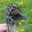

In [0]:
# Hover the cursor on a training sample, it will show the id of 
# the corresponding image. Use the ID here to show the image.
im, imnp = show_cifar_image(43507)
im

## 3.3 Training Algorithm

### A Manual "Training" Scheme

<span style="color:green">__EXERCISE__</span>

How the perceptron worked on the data? In the cell below, 
please attempt to modify the parameters of the perceptron model, so the prediction matches the data better.

In [0]:
# first_perceptron.update(dw0=0, dw1=0, db=0.05, verbose=True)
first_perceptron.set_param(w0=-0, w1=0.08, b=.0, verbose=True)
show_perceptron_model(first_perceptron, X_easy, y_easy)

Old perceptron: W0:-0.80, W1:0.08, b:0.00
New perceptron: W0:0.00, W1:0.08, b:0.00


### Training a Perceptron

The motiviation is as follows:

- we need to modify the model parameters when our perceptron makes predictions disagree with the given $y$ for some training data samples.

- Now consider an example: `[x0, x1, +1]`, since our perceptron predicted `-1` for `[x0, x1]` (otherwise, we won't consider this data sample now). That is to say, according to our perceptron model:

    `a == w0*x0 + w1*x1 + b < 0`
    
It is natural to take measures to increase `a`. As shown intuitively above, we can update the model parameters to "rotate" the classification boundary, so let us consider `w0` and `w1` for now.

> (If you feel uncomfortable about leaving `b` behind for now, please check [Chapter1.1 @ Equation 1.2][Abu-Mostafa et al. 2012] for a side note. The note is about treating the bias `b` as a special coefficient `w_b`. So we can bring `b` into the training framework below).

- Given a certain step size, say 0.1 -- `dw = (dw0, dw1)` and  $\sqrt{dw_0^2 + dw_1^2} = 0.1$ -- the most efficient way to let `a == w0*x0 + w1*x1` increase is to arrange `dw0` and `dw1` proportional to `x0` and `x1`.

$$
\begin{align}
\frac{dw_0}{dw_1} = \frac{dx_0}{dx_1}
\end{align}
$$

<span style="color:green">__EXERCISE__</span>

Sketch an illustration in a 2D plane, draw vectors of `x` and `w`, show why $\frac{dw_0}{dw_1} = \frac{dx_0}{dx_1}$ is most efficient given a fixed step size.


[Abu-Mostafa et al. 2012]:http://amlbook.com/

<span style="color:green">__EXERCISE (Main)__</span>

Create a perceptron and examine its performance on the training dataset in the cell below (the same as done in the previous section). 

Then study the code block "Individual Training Step" below. Try to get a perceptron with complete fit to the data.

In [0]:
perceptron_on_train = MyPerceptron2D()
show_perceptron_model(perceptron_on_train, X_easy, y_easy)

#### Individual Training Step

In [0]:
# Study Single Step Training

# Let the perceptron predict for X-samples and find where it makes mistakes
prediction_on_X_easy = perceptron_on_train.predict(X_easy)
E_in_index = list(np.nonzero(prediction_on_X_easy != y_easy)[0])
print("Error-in @", E_in_index)

if len(E_in_index) > 0:
    # Take one problematic sample 
    to_fix_index = E_in_index[0]
    to_fix_sign = y_easy[to_fix_index]
    dw = X_easy[to_fix_index]

    # To normalise the change to our prescribed stepsize 0.1
    stepsize = 0.1
    dw = dw / np.linalg.norm(dw) * stepsize * to_fix_sign
    print("Proposed adjustment of w {} (after normalisation), sign {}"
          .format(dw, to_fix_sign))

    # Apply the update and show
    perceptron_on_train.update(dw0=dw[0], dw1=dw[1], db=0, verbose=True)
else:
    print("Done training")
    
show_perceptron_model(perceptron_on_train, X_easy, y_easy)

# you may want to check individual samples (see the image) by using
# `show_cifar_image` as above. 

Error-in @ [3, 7, 14, 17]
Proposed adjustment of w [-0.08212879  0.05705141] (after normalisation), sign 1
Old perceptron: W0:0.84, W1:0.11, b:0.00
New perceptron: W0:0.75, W1:0.17, b:0.00


#### Training Procedure

Me Exercise




In [0]:
class MyPerceptron2D:
    def __init__(self):
        """
        There are three parameters for a perceptron working on 2D data.
        w0, w1: the coefficients of the first and second attribute x0 and x1, respectively
        b: the bias
        """
        self.w0 = 1.0
        self.w1 = 0
        self.b = 0
        
    def predict(self, x):
        """
        Given a data sample (x0, x1), the perceptron first computes the 
        "pre-activation potential" -- a term borrowed from biological neurons --
        using simple linear function:
        
            pre-activation := w0 * x0 + w1 * x1 + bias
        
        Note this implementation we accept numpy array as input `x`, where 
        x is of the format 
        [[x0, x1] .. for sample-0
         [x0, x1] .. for sample-1
         [x0, x1] .. for sample-2
         ...]
         
        it contains N samples, each of 2 attributes. As a Numpy array, x provides 
        convenient access to specific attributes of all samples. We can compute
        the pre-activation values of N samples easily as shown in the code.
        
        The prediction is straightforward given the pre-activation values: it amounts to
        determine if the pre-activation is above or below zero.
        """
        prediction = x[:, 0] * self.w0 \
            + x[:, 1] * self.w1 \
            + self.b
        
        prediction[prediction > 0] = 1
        prediction[prediction <= 0] = -1
        return prediction
    
    
    def update(self, dw0, dw1, db, verbose=False):
        """
        Incrementally adjust the model parameters
        """
        if verbose:
            print("Old perceptron:", self)
        self.w0 += dw0
        self.w1 += dw1
        self.b += db
        if verbose: 
            print("New perceptron:", self)
            
    def set_param(self, w0, w1, b, verbose=False):
        if verbose:
            print("Old perceptron:", self)
        self.w0 = w0
        self.w1 = w1
        self.b = b
        if verbose: 
            print("New perceptron:", self)
            
            
    def fit(self, X, y):
        raise NotImplementedError
    
    def __str__(self):
        return "W0:{:.2f}, W1:{:.2f}, b:{:.2f}".format(self.w0, self.w1, self.b)

In [0]:
perceptron_on_train = MyPerceptron2D()
perceptron_on_train.fit(X_easy, y_easy)
show_perceptron_model(perceptron_on_train, X_easy, y_easy)

NotImplementedError: ignored

<span style="color:green">__EXERCISE (Main)__</span>

1. Wrap the training code block with a loop to make a working training procedure.
2. Copy-and-paste the definition of perceptron below, and provide the implementation of the `fit` method.
3. Try `sklearn` perceptron implementation and train the model. Take a note on this common _interface_ of machine learning algorithm design.

In [0]:
# Test sklearn Perceptron
from sklearn.linear_model import Perceptron

skperceptron = Perceptron()
# Perform training here
show_perceptron_model(skperceptron, X_easy, y_easy)